# Scale video

In [3]:
import cv2
from IPython.display import display, Image

# 定义视频文件路径
video_path = 'E:/NUS/5003/Camera_cali/ivy_data/ARGait_P_JS_Freewalk_31-01-2024_10-09-20/output.mp4'
output_video_path = 'E:/NUS/5003/Camera_cali/ivy_data/ARGait_P_JS_Freewalk_31-01-2024_10-09-20/squash.mp4'
# 打开视频文件
cap = cv2.VideoCapture(video_path, cv2.CAP_ANY)
cap

In [4]:

# 检查是否成功打开视频
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # 获取视频的帧宽度和帧高度
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # 定义横向和纵向拉伸因子
    scale_x = 1080/frame_width  # 2表示横向拉伸为原来的两倍
    scale_y = 1920/frame_height  # 0.5表示纵向拉伸为原来的一半

# 创建VideoWriter对象
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 视频编码格式，可以根据需要修改
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(frame_width * scale_x), int(frame_height * scale_y)))

while cap.isOpened():
    # 读取视频帧
    ret, frame = cap.read()
    if not ret:
        break

    # 横向和纵向拉伸
    new_width = int(frame_width * scale_x)
    new_height = int(frame_height * scale_y)
    resized_frame = cv2.resize(frame, (new_width, new_height))

    # 将处理后的帧写入输出视频文件
    out.write(resized_frame)

# 释放视频对象和写入对象
cap.release()
out.release()

print("Stretched video saved successfully.")


# CUT SINGLE video into frames

In [5]:
import cv2
import os
from moviepy.video.io.VideoFileClip import VideoFileClip
import imageio


# 定义视频文件路径
folder_path = 'E:/NUS/5003/Camera_cali/ivy_data/low1/squash.mp4'

# 定义保存图像的文件夹路径
output_folder = 'E:/NUS/5003/Camera_cali/ivy_data/low1/frames_20/'

# 创建保存图像的文件夹（如果不存在）
os.makedirs(output_folder, exist_ok=True)

# 打开视频文件
cap = cv2.VideoCapture(folder_path)


def split_video_into_frames(video_path, output_folder, frame_rate):
    # 打开视频文件
    video_clip = VideoFileClip(video_path)

    # 计算每帧的时间间隔
    frame_interval = 1 / frame_rate

    # 循环处理每帧
    for i, frame in enumerate(video_clip.iter_frames(fps=frame_rate, dtype='uint8')):
        # 创建图像文件名
        image_filename = f"{output_folder}/%s.png"%i

        # 保存当前帧为图像文件
        video_clip.save_frame(image_filename, t=i * frame_interval)

    # 关闭视频文件
    video_clip.reader.close()

split_video_into_frames(folder_path,output_folder, 19.86)   # last number is frame rate 



# Check frame Coordinate of heel toe

In [27]:
import cv2
import numpy as np

# 读取图片
image_path = '55.png'
image = cv2.imread(image_path)

print(image.shape)
# 假设有两个坐标点 (x1, y1) 和 (x2, y2)
heel = (451, 1184)  # heel
toe = (511, 1175)  # toe


(1920, 1080, 3)


In [28]:
# 在图像上标记坐标点
cv2.circle(image, heel, 5, (0, 255, 0), -1)  # 绿色是heel
cv2.circle(image, toe, 5, (0, 0, 255), -1)  # 红色是toe

x, y, w, h = 200, 900, 600, 600  # 例如，从 (100, 50) 开始，宽度为200，高度为150
roi = image[y:y+h, x:x+w]


# 显示图像
cv2.imshow('Image with Marked Points', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Get true coordinate, rotate to LIDAR

In [36]:
import numpy as np
import pandas as pd


In [37]:
# for frame 87
heel = np.array([626.8774819, 1213.684785])
toe =  np.array([549.8038041, 1191.720375])

In [43]:
k = 1920/256
heel = heel/k
toe = toe/k
heel,toe

(array([ 83.58366425, 161.824638  ]), array([ 73.30717388, 158.89605   ]))

In [45]:
x_heel_lidar =  int(144-heel[0])
y_heel_lidar =  int(heel[1])
x_toe_lidar = int(144-toe[0])
y_toe_lidar = int(toe[1])

   0.000000  1.356445  1.430664  1.438477  1.449219  1.463867  1.475586  \
0  0.033318  1.474609  1.552734  1.564453  1.580078  1.598633  1.614258   
1  0.066637  1.729492  1.849609  1.870117  1.891602  1.911133  1.925781   
2  0.099955  1.275391  1.358398  1.368164  1.379883  1.394531  1.405273   
3  0.133273  1.500000  1.579102  1.594727  1.614258  1.633789  1.649414   

   1.477539  1.477539.1  1.480469  ...  1.121094.24  1.117188.32  1.111328.24  \
0  1.622070    1.625977  1.631836  ...     1.051758     1.048828     1.043945   
1  1.930664    1.928711  1.930664  ...     2.011719     2.003906     1.990234   
2  1.405273    1.399414  1.401367  ...     1.116211     1.113281     1.107422   
3  1.657227    1.662109  1.667969  ...     1.078125     1.074219     1.068359   

   1.105469.19  1.095703.32  1.082031.38  1.076172.18  1.029297  0.995117  \
0     1.041016     1.034180     1.021484     1.009766  0.964844  0.937500   
1     1.981445     1.965820     1.952148     1.941406  1.877930 

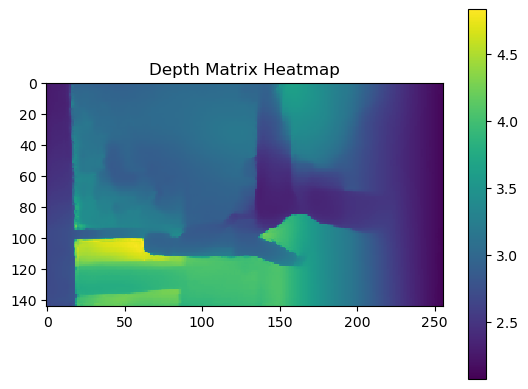

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lidar_df = pd.read_csv('E:/NUS/5003/Camera_cali/ivy_data/ivy1/lidar.csv')
frame_info_df = pd.read_csv('E:/NUS/5003/Camera_cali/ivy_data/ivy1/HSTO_info.csv')

depth_mtx = np.array(lidar_df.iloc[86,1:]).reshape( 144 , 256)  # 144 row, 256 column  ## at t = 2.9s, should be row index = 86

# 使用matplotlib绘制heatmap
plt.imshow(depth_mtx, cmap='viridis', interpolation='nearest')
plt.colorbar()  # 添加颜色条以显示深度值对应的颜色
plt.title('Depth Matrix Heatmap')
plt.show()

In [47]:
heel_depth = depth_mtx[x_heel_lidar, y_heel_lidar]
toe_depth =  depth_mtx[x_toe_lidar,  y_toe_lidar ]
heel_depth, toe_depth

(2.650391, 2.355469)

In [62]:
camera_mtx1 = pd.read_csv(os.getcwd()+'/ivy_data/LabCamera/parameter_mtx1.csv')
camera_mtx2 = pd.read_csv(os.getcwd()+'/ivy_data/LabCamera/parameter_mtx2.csv')

avg_camera_mtx = (camera_mtx1+camera_mtx2) /2

In [63]:
camera_mtx1 = camera_mtx1.iloc[:,1:]
camera_mtx2 = camera_mtx2.iloc[:,1:]
camera_mtx1 = np.array(camera_mtx1)
camera_mtx2 = np.array(camera_mtx2)

In [65]:
avg_camera_mtx = (camera_mtx1+camera_mtx2) /2

In [67]:
Xc_heel = heel_depth*(x_heel_lidar-avg_camera_mtx[0,2])/avg_camera_mtx[0,0]
Yc_heel = heel_depth*(y_heel_lidar-avg_camera_mtx[1,2])/avg_camera_mtx[1,1]
Xc_toe = toe_depth*(x_toe_lidar-avg_camera_mtx[0,2])/avg_camera_mtx[0,0]
Yc_toe = toe_depth*(x_toe_lidar-avg_camera_mtx[1,2])/avg_camera_mtx[1,1]

In [72]:
Xc_toe,Xc_heel

(-0.4691593756178517, -0.5400981367989168)

In [73]:
sin_theta = abs(Yc_heel-Yc_toe)/(np.sqrt(  (Xc_heel-Xc_toe)**2+(Yc_heel-Yc_toe)**2+ (heel_depth-toe_depth)**2 )  )
theta = np.arcsin(sin_theta)

In [76]:
theta = np.degrees(theta)
theta

23.7704772298462